In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

In [22]:
import random
index=['매출','비용']
q1 = pd.DataFrame(np.random.randint(100, 1000, 12).reshape(2,6), index=index,columns = ['1월','2월','3월','4월','5월','6월'])
q2 = pd.DataFrame(np.random.randint(100, 1000, 12).reshape(2,6), index=index,columns = ['7월','8월','9월','10월','11월','12월'])
Q1=q1.T ; Q2=q2.T
Q1['이익'] = Q1.매출 - Q1.비용
Q2['이익'] = Q2.매출 - Q2.비용
con=pd.concat( [Q1,Q2], axis=0)
df=con.T
df['실적'] = df.sum(axis=1)
df.T.append({'매출': 10,'비용':20,'이익':30}, ignore_index=True)


,매출,비용,이익
0,784,807,-23
1,659,459,200
2,729,109,620
3,292,823,-531
4,935,377,558
5,863,854,9
6,904,414,490
7,699,805,-106
8,170,586,-416
9,572,651,-79


In [23]:
np.random.seed(0)
df2 = pd.DataFrame({
    'key1': ['A', 'A', 'B', 'B', 'A'],
    'key2': ['one', 'two', 'one', 'two', 'one'],
    'data1': [1, 2, 3, 4, 5],
    'data2': [10, 20, 30, 40, 50]
})
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [24]:
df2.groupby('key1')[['data1']].sum()

,data1
key1,
A,8
B,7


In [25]:
df2.data1.groupby(df2.key1).sum()

key1
A    8
B    7
Name: data1, dtype: int64

In [26]:
df2.groupby(df2.key1)[['data1']].sum()

,data1
key1,
A,8
B,7


In [27]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df.species.map(lambda x : iris.target_names[x])
df



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [28]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df.species.map(lambda x : iris.target_names[x])
df.groupby(df.species).mean()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [29]:
df.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [30]:
df.pivot_table('petal length (cm)', 'species', 'petal width (cm)', aggfunc='count', margins=True )

petal width (cm),0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.1,1.2,1.3,...,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,All
species,,,,,,,,,,,,,,,,,,,,,
setosa,5.0,29.0,7.0,7.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50
versicolor,NaN,NaN,NaN,NaN,NaN,NaN,7.0,3.0,5.0,13.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50
virginica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,11.0,5.0,6.0,6.0,3.0,8.0,3.0,3.0,50
All,5.0,29.0,7.0,7.0,1.0,1.0,7.0,3.0,5.0,13.0,...,2.0,12.0,5.0,6.0,6.0,3.0,8.0,3.0,3.0,150


In [31]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips['pct'] = tips.tip / tips.total_bill *100
tips.groupby(by=['day','time','size'])['pct'].describe()


count       mean        std        min        25%  \
day  time   size                                                      
Thur Lunch  1       1.0  18.172790        NaN  18.172790  18.172790   
            2      47.0  16.402425   3.770506   7.861635  13.980151   
            3       4.0  14.459879   7.066545   7.296137   8.988802   
            4       5.0  14.551515   3.124066  11.598237  12.126246   
            5       1.0  12.138869        NaN  12.138869  12.138869   
            6       3.0  17.370592   2.885735  14.093960  16.289124   
     Dinner 2       1.0  15.974441        NaN  15.974441  15.974441   
Fri  Lunch  1       1.0  22.377622        NaN  22.377622  22.377622   
            2       5.0  18.196867   5.285592  11.773472  15.365704   
            3       1.0  18.773467        NaN  18.773467  18.773467   
     Dinner 2      11.0  16.265852   4.740802  10.355540  13.373871   
            4       1.0  11.774956        NaN  11.774956  11.774956   
Sat  Dinner 1       2.0  23.183197  13.279597  13.793103  18.488150   
            2      53.0  15.528884   5.039150   3.563814  12.942192   
            3      18.0  15.143861   4.429443   5.643341  12.876720   
            4      13.0  13.828925   4.610683   7.745933  10.252157   
            5       1.0  10.657194        NaN  10.657194  10.657194   
Sun  Dinner 2      39.0  18.086960  10.824482   5.944673  12.105672   
            3      15.0  15.266238   4.360430   7.180385  13.265279   
            4      18.0  15.316820   4.392113   8.146640  12.641516   
            5       3.0  15.983894   8.864950   6.565988  11.892709   
            6       1.0  10.379905        NaN  10.379905  10.379905   

                        50%        75%        max  
day  time   size                                   
Thur Lunch  1     18.172790  18.172790  18.172790  
            2     15.384615  19.194989  26.631158  
            3     14.582219  20.053296  21.378942  
            4     14.705882  14.843526  19.483682  
            5     12.138869  12.138869  12.138869  
            6     18.484288  19.008908  19.533528  
     Dinner 2     15.974441  15.974441  15.974441  
Fri  Lunch  1     22.377622  22.377622  22.377622  
            2     18.092105  19.821606  25.931446  
            3     18.773467  18.773467  18.773467  
     Dinner 2     14.662757  18.448578  26.348039  
            4     11.774956  11.774956  11.774956  
Sat  Dinner 1     23.183197  27.878243  32.573290  
            2     15.521855  18.839488  29.198966  
            3     15.347889  17.993791  23.074192  
            4     13.623978  18.621974  20.557682  
            5     10.657194  10.657194  10.657194  
Sun  Dinner 2     16.629712  20.291827  71.034483  
            3     16.054159  17.031214  22.774708  
            4     14.969118  16.969623  28.053517  
            5     17.219430  20.692847  24.166264  
            6     10.379905  10.379905  10.379905

In [32]:
y= tips.pct
y

0       5.944673
1      16.054159
2      16.658734
3      13.978041
4      14.680765
         ...    
239    20.392697
240     7.358352
241     8.822232
242     9.820426
243    15.974441
Name: pct, Length: 244, dtype: float64

In [33]:
tips

,total_bill,tip,sex,smoker,day,time,size,pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


In [34]:
tips = pd.get_dummies(tips, drop_first=True)
tips.columns

Index(['total_bill', 'tip', 'size', 'pct', 'sex_Female', 'smoker_No',
       'day_Fri', 'day_Sat', 'day_Sun', 'time_Dinner'],
      dtype='object')

In [35]:
from sklearn.linear_model import LinearRegression

y= tips.pct
X=tips.drop('pct', axis=1)
lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)


0.7375112854241102

In [36]:
import seaborn as sns
titanic= sns.load_dataset("titanic")
df=pd.qcut(titanic.age, 3, labels=['어린놈','성인놈','어르신놈'])
titanic['age_group'] = df
df=titanic.groupby(['sex','pclass','age_group'])[['survived']].mean()
df.unstack('pclass')

survived                    
pclass                   1         2         3
sex    age_group                              
female 어린놈        0.954545  1.000000  0.508475
       성인놈        0.947368  0.909091  0.481481
       어르신놈       0.977273  0.857143  0.250000
male   어린놈        0.500000  0.357143  0.158879
       성인놈        0.500000  0.076923  0.195652
       어르신놈       0.347826  0.062500  0.055556

In [37]:
titanic.pivot_table('survived', ['sex','age_group'],'pclass')

pclass                   1         2         3
sex    age_group                              
female 어린놈        0.954545  1.000000  0.508475
       성인놈        0.947368  0.909091  0.481481
       어르신놈       0.977273  0.857143  0.250000
male   어린놈        0.500000  0.357143  0.158879
       성인놈        0.500000  0.076923  0.195652
       어르신놈       0.347826  0.062500  0.055556

In [49]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,어린놈
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,어르신놈
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,성인놈
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,어르신놈
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,어르신놈
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,성인놈
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,어린놈
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,성인놈


In [62]:
new_data=pd.Series(np.arange(12))

In [78]:
titanic.columns.value_counts().sum()

16

In [79]:
new_data=pd.Series(np.arange(16), index=titanic.columns)

idx = 891

temp1 = titanic[titanic.index < idx]
temp2 = titanic[titanic.index >= idx]

df3 = temp1.append(new_data, ignore_index=True).append(temp2, ignore_index=True)
df3

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,NaN,Southampton,no,0,어린놈
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0,어르신놈
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,NaN,Southampton,yes,1,성인놈
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0,어르신놈
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,NaN,Southampton,no,1,어르신놈
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,1,1,female,19.0,0,0,30.0000,S,First,woman,0,B,Southampton,yes,1,어린놈
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,0,NaN,Southampton,no,0,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,1,C,Cherbourg,yes,1,성인놈
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,1,NaN,Queenstown,no,1,성인놈


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

model = DecisionTreeClassifier(criterion='entropy')
model

DecisionTreeClassifier(criterion='entropy')

In [3]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,51):

  knc = KNeighborsClassifier(n_neighbors=i)
  knc.fit(X_train, y_train)
  print(f'n_neighbors = {i}, {knc.score(X_test, y_test)}')

n_neighbors = 1, 0.9300699300699301
n_neighbors = 2, 0.9230769230769231
n_neighbors = 3, 0.9300699300699301
n_neighbors = 4, 0.9440559440559441
n_neighbors = 5, 0.965034965034965
n_neighbors = 6, 0.951048951048951
n_neighbors = 7, 0.958041958041958
n_neighbors = 8, 0.958041958041958
n_neighbors = 9, 0.958041958041958
n_neighbors = 10, 0.972027972027972
n_neighbors = 11, 0.9790209790209791
n_neighbors = 12, 0.9790209790209791
n_neighbors = 13, 0.972027972027972
n_neighbors = 14, 0.972027972027972
n_neighbors = 15, 0.965034965034965
n_neighbors = 16, 0.965034965034965
n_neighbors = 17, 0.965034965034965
n_neighbors = 18, 0.972027972027972
n_neighbors = 19, 0.965034965034965
n_neighbors = 20, 0.965034965034965
n_neighbors = 21, 0.965034965034965
n_neighbors = 22, 0.965034965034965
n_neighbors = 23, 0.965034965034965
n_neighbors = 24, 0.965034965034965
n_neighbors = 25, 0.951048951048951
n_neighbors = 26, 0.951048951048951
n_neighbors = 27, 0.951048951048951
n_neighbors = 28, 0.95104895104

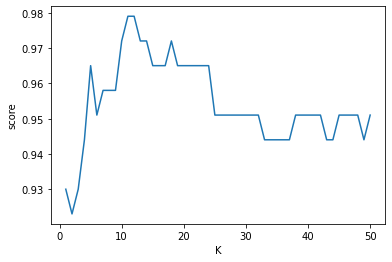

In [7]:
import numpy as np
import matplotlib.pyplot as plt
list = np.arange(1,51)
score = []
for i in range(1,51):  
    knc = KNeighborsClassifier(n_neighbors=i)  
    knc.fit(X_train, y_train)  
    score.append(knc.score(X_test, y_test))
plt.plot(list, score)
plt.xlabel('K')
plt.ylabel('score')
plt.show()

<AxesSubplot:ylabel='species'>

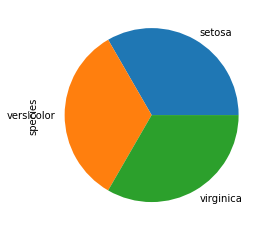

In [44]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df= pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species']=df.species.apply(lambda x : iris.target_names[x])
df.species.value_counts().plot.pie()


In [48]:
new_data=df.iloc[5,:]

idx = 146
temp1 = df[df.index < idx]
temp2 = df[df.index >= idx]

df2 = temp1.append(new_data, ignore_index=True).append(temp2, ignore_index=True)
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,5.4,3.9,1.7,0.4,setosa
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.972027972027972

In [51]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [54]:
from sklearn.model_selection import GridSearchCV
param = { 'max_depth' : [1,2,3,4],
            'max_samples' : [3,4,5,6]}


gs = GridSearchCV(rfc, param, n_jobs=1, cv=3, verbose=2)
gs.fit(X_train, y_train)



Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .........................max_depth=1, max_samples=3; total time=   0.0s
[CV] END .........................max_depth=1, max_samples=3; total time=   0.0s
[CV] END .........................max_depth=1, max_samples=3; total time=   0.0s
[CV] END .........................max_depth=1, max_samples=4; total time=   0.0s
[CV] END .........................max_depth=1, max_samples=4; total time=   0.0s
[CV] END .........................max_depth=1, max_samples=4; total time=   0.0s
[CV] END .........................max_depth=1, max_samples=5; total time=   0.0s
[CV] END .........................max_depth=1, max_samples=5; total time=   0.0s
[CV] END .........................max_depth=1, max_samples=5; total time=   0.0s
[CV] END .........................max_depth=1, max_samples=6; total time=   0.0s
[CV] END .........................max_depth=1, max_samples=6; total time=   0.0s
[CV] END .........................max_depth=1, m

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'max_samples': [3, 4, 5, 6]},
             verbose=2)

In [56]:
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

RandomForestClassifier(max_depth=4, max_samples=5)
{'max_depth': 4, 'max_samples': 5}
0.9272300469483569


In [57]:
param = { 'max_depth' : [1,2,3,4,5,6],
            'max_samples' : [3,4,5,6]}
gs = GridSearchCV(rfc, param, n_jobs=1, cv=3, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END .........................max_depth=1, max_samples=3; total time=   0.0s
[CV] END .........................max_depth=1, max_samples=3; total time=   0.0s
[CV] END .........................max_depth=1, max_samples=3; total time=   0.0s
[CV] END .........................max_depth=1, max_samples=4; total time=   0.0s
[CV] END .........................max_depth=1, max_samples=4; total time=   0.0s
[CV] END .........................max_depth=1, max_samples=4; total time=   0.0s
[CV] END .........................max_depth=1, max_samples=5; total time=   0.0s
[CV] END .........................max_depth=1, max_samples=5; total time=   0.0s
[CV] END .........................max_depth=1, max_samples=5; total time=   0.0s
[CV] END .........................max_depth=1, max_samples=6; total time=   0.0s
[CV] END .........................max_depth=1, max_samples=6; total time=   0.0s
[CV] END .........................max_depth=1, m

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_samples': [3, 4, 5, 6]},
             verbose=2)

In [58]:
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

RandomForestClassifier(max_depth=2, max_samples=5)
{'max_depth': 2, 'max_samples': 5}
0.9225352112676056
